In [1]:
# Importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Estilo dos gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Carrega o arquivo CSV
df = pd.read_csv('./candidatos_2024/consulta_cand_2024_PR.csv', sep=';', encoding='latin1')

# Visualiza as primeiras linhas
df.head()


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,13/04/2025,19:30:07,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,153,TÉCNICO EM AGRONOMIA E AGRIMENSURA,4,NÃO ELEITO
1,13/04/2025,19:30:07,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,125,ADMINISTRADOR,4,NÃO ELEITO
2,13/04/2025,19:30:07,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,275,PREFEITO,1,ELEITO
3,13/04/2025,19:30:07,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,257,EMPRESÁRIO,4,NÃO ELEITO
4,13/04/2025,19:30:07,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,923,APOSENTADO (EXCETO SERVIDOR PÚBLICO),1,ELEITO


In [2]:
# Dimensões do dataset
print(f"Total de linhas: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")

# Informações gerais
df.info()

# Verifica valores nulos
df.isnull().sum().sort_values(ascending=False).head(10)


Total de linhas: 34021
Total de colunas: 50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34021 entries, 0 to 34020
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DT_GERACAO                     34021 non-null  object
 1   HH_GERACAO                     34021 non-null  object
 2   ANO_ELEICAO                    34021 non-null  int64 
 3   CD_TIPO_ELEICAO                34021 non-null  int64 
 4   NM_TIPO_ELEICAO                34021 non-null  object
 5   NR_TURNO                       34021 non-null  int64 
 6   CD_ELEICAO                     34021 non-null  int64 
 7   DS_ELEICAO                     34021 non-null  object
 8   DT_ELEICAO                     34021 non-null  object
 9   TP_ABRANGENCIA                 34021 non-null  object
 10  SG_UF                          34021 non-null  object
 11  SG_UE                          34021 non-null  int64 
 12  NM_UE           

DT_NASCIMENTO                    24
DT_GERACAO                        0
NR_TITULO_ELEITORAL_CANDIDATO     0
NM_PARTIDO                        0
NR_FEDERACAO                      0
NM_FEDERACAO                      0
SG_FEDERACAO                      0
DS_COMPOSICAO_FEDERACAO           0
SQ_COLIGACAO                      0
NM_COLIGACAO                      0
dtype: int64

In [4]:
# --- Bloco de Limpeza e Preparação de Dados (Versão com Verificação de Substring) ---

print(f"Dimensões originais do DataFrame: {df.shape}")

# 1. Remover linhas com dados faltantes (NaN) em DT_NASCIMENTO.
df.dropna(subset=['DT_NASCIMENTO'], inplace=True)
print(f"Dimensões após remover NaNs: {df.shape}")

# 2. Remover todas as linhas que contenham substrings indesejadas.
#    Este método é mais robusto pois procura o texto DENTRO da string da célula.
linhas_antes = len(df)

# Usamos .str.contains() com case=False para ser insensível a maiúsculas/minúsculas.
# O operador '~' (negação) mantém apenas as linhas que NÃO contêm a substring.
# O na=False evita erros caso a coluna tenha algum valor NaN remanescente.

df = df[~df['DS_SIT_TOT_TURNO'].str.contains('NULO', case=False, na=False)]
df = df[~df['DS_GRAU_INSTRUCAO'].str.contains('nulo', case=False, na=False)]
df = df[~df['DS_GRAU_INSTRUCAO'].str.contains('Não divulgável', case=False, na=False)]

# Você pode adicionar filtros para outras colunas aqui seguindo o mesmo padrão.
# Exemplo: df = df[~df['OUTRA_COLUNA'].str.contains('Outro Valor', case=False, na=False)]

linhas_depois = len(df)
print(f"\nDimensões finais após toda a limpeza: {df.shape}")
print(f"{linhas_antes - linhas_depois} linhas foram removidas na limpeza de categorias.")

# O DataFrame 'df' agora está verdadeiramente limpo e pronto para as análises.

Dimensões originais do DataFrame: (33997, 50)
Dimensões após remover NaNs: (33997, 50)

Dimensões finais após toda a limpeza: (32444, 50)
1553 linhas foram removidas na limpeza de categorias.


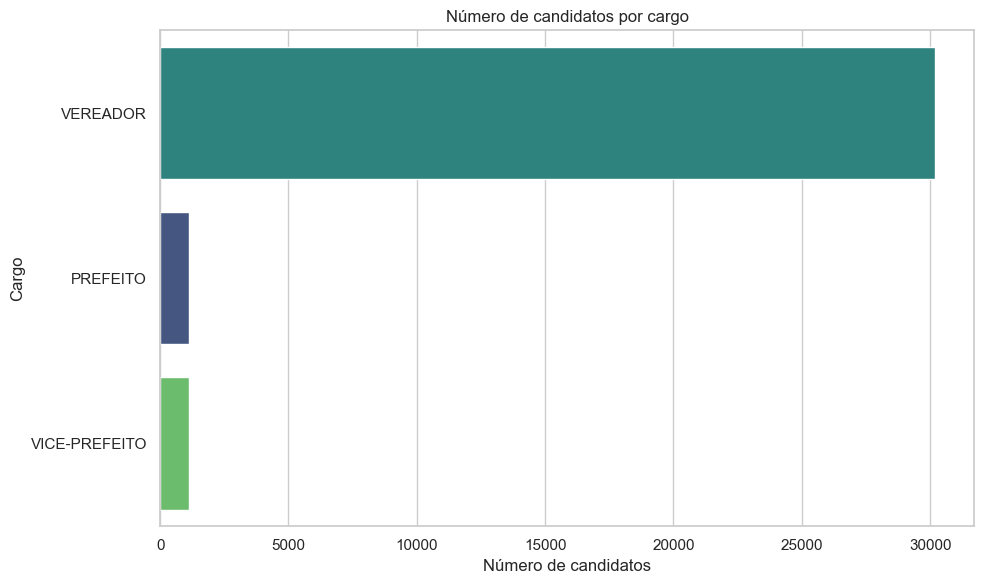

In [5]:
cargo_counts = df['DS_CARGO'].value_counts()
sns.countplot(data=df, y='DS_CARGO', order=cargo_counts.index, hue='DS_CARGO', palette='viridis', legend=False)
plt.title("Número de candidatos por cargo")
plt.xlabel("Número de candidatos")
plt.ylabel("Cargo")
plt.tight_layout()
plt.show()


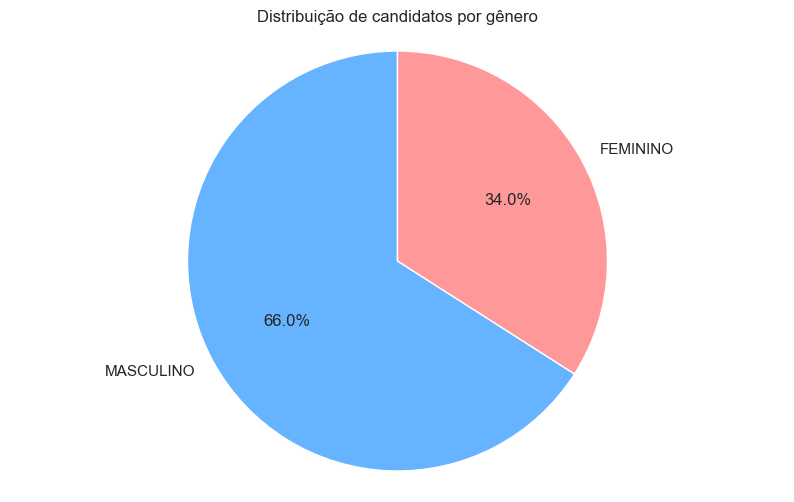

In [6]:
sexo_counts = df['DS_GENERO'].value_counts()
sexo_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Distribuição de candidatos por gênero")
plt.ylabel("")
plt.axis('equal')
plt.show()


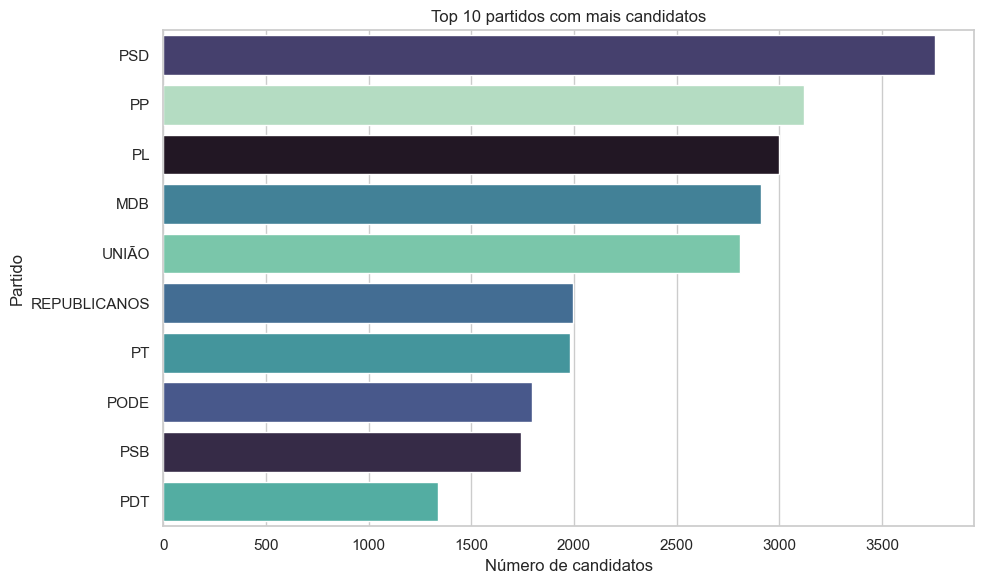

In [7]:
top_partidos = df['SG_PARTIDO'].value_counts().head(10)
sns.countplot(data=df[df['SG_PARTIDO'].isin(top_partidos.index)], y='SG_PARTIDO', 
              order=top_partidos.index, hue='SG_PARTIDO', palette='mako', legend=False)
plt.title("Top 10 partidos com mais candidatos")
plt.xlabel("Número de candidatos")
plt.ylabel("Partido")
plt.tight_layout()
plt.show()


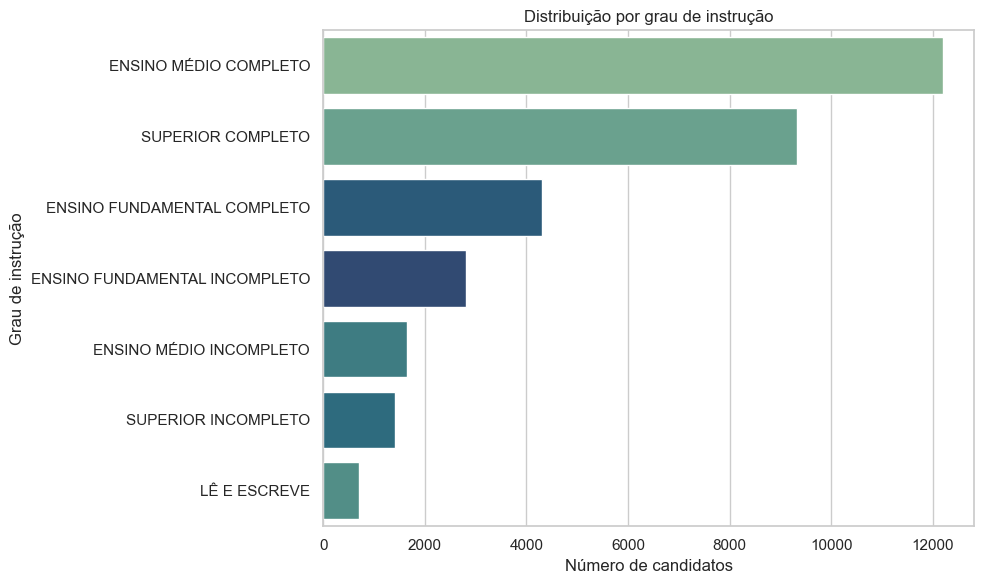

In [8]:
instrucao_counts = df['DS_GRAU_INSTRUCAO'].value_counts()
sns.countplot(data=df, y='DS_GRAU_INSTRUCAO', order=instrucao_counts.index, hue='DS_GRAU_INSTRUCAO', 
              palette='crest', legend=False)
plt.title("Distribuição por grau de instrução")
plt.xlabel("Número de candidatos")
plt.ylabel("Grau de instrução")
plt.tight_layout()
plt.show()


In [9]:
print(df.columns.tolist())


['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA', 'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO', 'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO', 'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO']


In [10]:
from datetime import datetime

# Converte a data de nascimento para datetime
df['DT_NASCIMENTO'] = pd.to_datetime(df['DT_NASCIMENTO'], errors='coerce', format='%d/%m/%Y')

# Define a data da eleição
data_eleicao = datetime(2024, 10, 6)

# Calcula a idade com base na data da eleição
df['IDADE'] = df['DT_NASCIMENTO'].apply(lambda nascimento: 
    data_eleicao.year - nascimento.year - ((data_eleicao.month, data_eleicao.day) < (nascimento.month, nascimento.day))
    if pd.notnull(nascimento) else None
)

# Visualiza
df[['NM_CANDIDATO', 'DT_NASCIMENTO', 'IDADE']].head()


,NM_CANDIDATO,DT_NASCIMENTO,IDADE
0,JAIR MILANI,1958-03-25,66
1,RAFAEL DANTAS,1987-02-12,37
2,JAELSON RAMALHO MATTA,1963-10-19,60
3,SERGIO CAVAGNI,1975-06-17,49
4,LUIZ CARLOS ASSUNÇÃO,1955-04-17,69


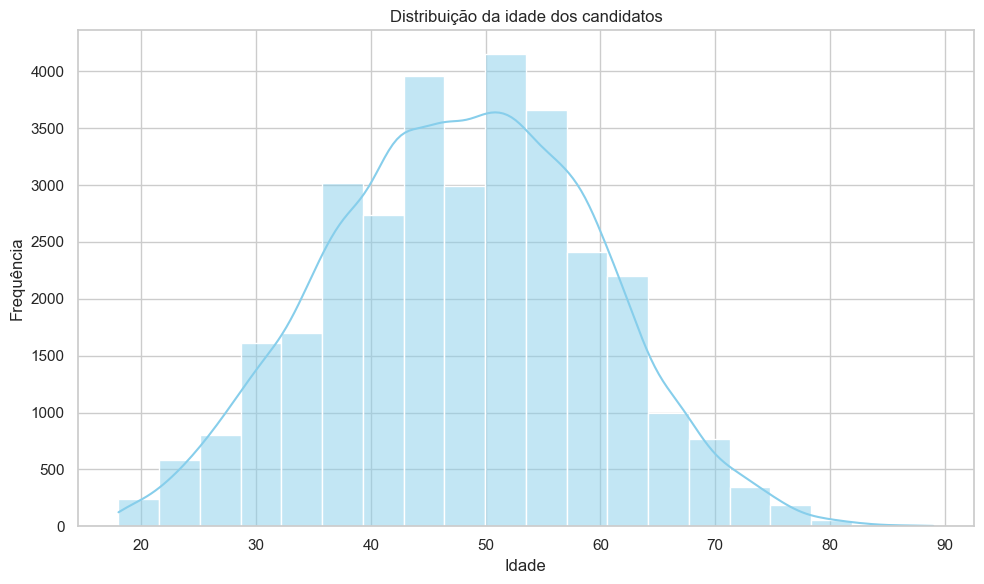

In [11]:
sns.histplot(data=df, x='IDADE', bins=20, kde=True, color='skyblue')
plt.title("Distribuição da idade dos candidatos")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


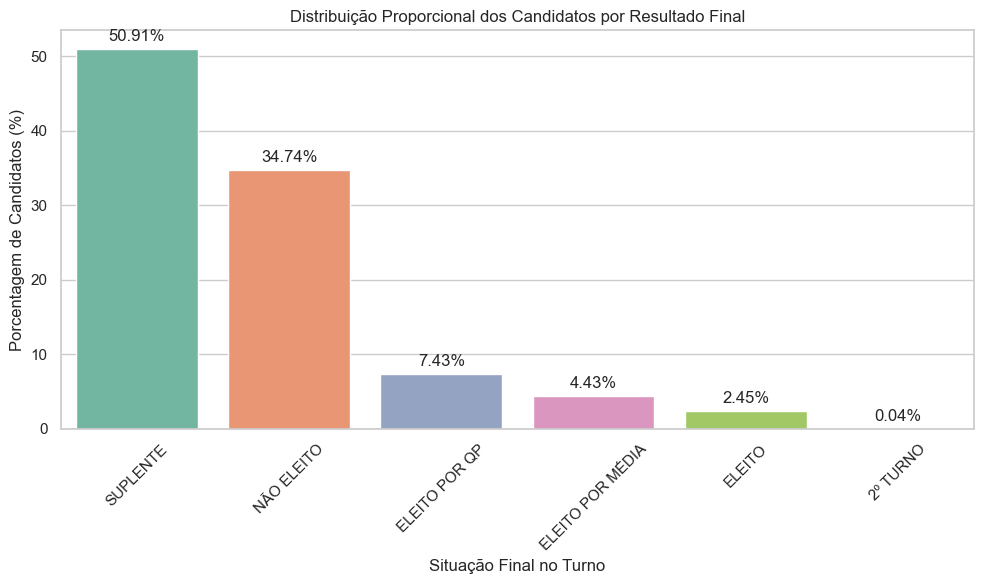

In [12]:
# 1. Calcular as contagens e depois a proporção em porcentagem
total_candidatos = len(df)
situacao_counts = df['DS_SIT_TOT_TURNO'].value_counts()
situacao_proporcao = (situacao_counts / total_candidatos) * 100

# 2. Converter a Series para um DataFrame para usar no barplot
df_proporcao = situacao_proporcao.reset_index()
df_proporcao.columns = ['Situacao_Final', 'Porcentagem']

# 3. Gerar o gráfico de barras com as proporções
plt.figure(figsize=(10, 6)) # Ajusta o tamanho da figura
ax = sns.barplot(data=df_proporcao, x='Situacao_Final', y='Porcentagem', hue='Situacao_Final', 
                 order=situacao_counts.index, palette='Set2', legend=False)

# 4. Adicionar os valores percentuais no topo das barras para clareza
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# --- Fim das modificações ---

# Títulos e rótulos originais, com ajuste no eixo Y
plt.title("Distribuição Proporcional dos Candidatos por Resultado Final")
plt.xlabel("Situação Final no Turno")
plt.ylabel("Porcentagem de Candidatos (%)") # Rótulo do eixo Y atualizado
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

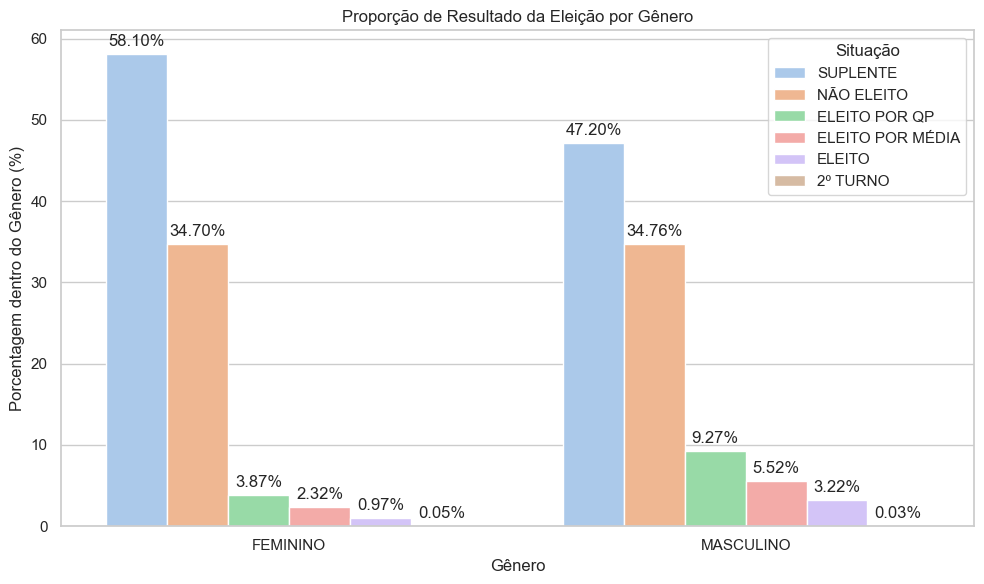

In [13]:
# 1. Calcular a proporção (código mantido da etapa anterior, sem redundância)
df_prop = df.groupby('DS_GENERO')['DS_SIT_TOT_TURNO'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()

# 2. Gerar o gráfico de barras agrupado
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_prop, x='DS_GENERO', y='Porcentagem', hue='DS_SIT_TOT_TURNO', palette='pastel')

# 3. Adicionar os valores percentuais no topo de cada barra (COM A CORREÇÃO)
for p in ax.patches:
    # Apenas adiciona a anotação se a altura da barra for maior que 0
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.2f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

# 4. Títulos e rótulos
plt.title("Proporção de Resultado da Eleição por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Porcentagem dentro do Gênero (%)")
plt.legend(title='Situação')
plt.tight_layout()
plt.show()


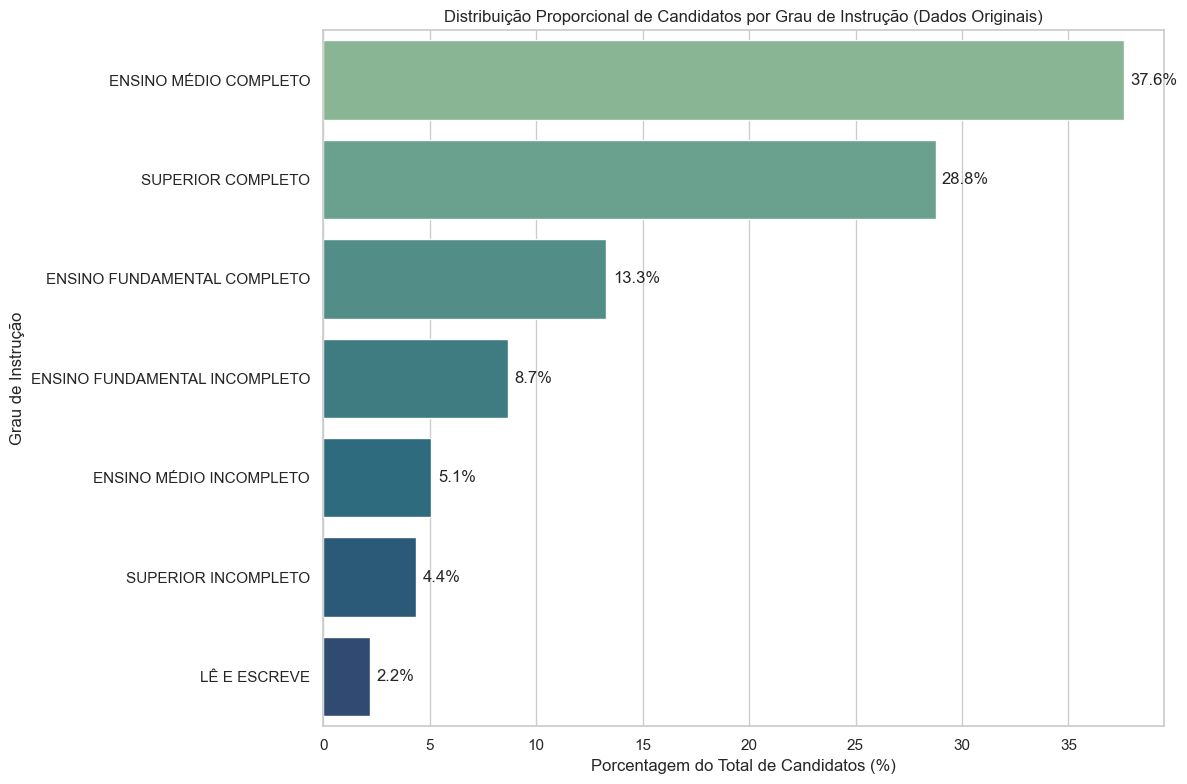

In [16]:
# --- Bloco para Gráfico Proporcional de Escolaridade (Dados Originais) ---

# 1. Calcular a proporção de cada grau de instrução em relação ao total de candidatos.
#    Note que estamos usando o DataFrame 'df' original, sem filtros.
total_candidatos_original = len(df)
prop_instrucao_original = (df['DS_GRAU_INSTRUCAO'].value_counts() / total_candidatos_original) * 100

# 2. Converter a Series para um DataFrame para a plotagem.
df_prop_geral_original = prop_instrucao_original.reset_index()
df_prop_geral_original.columns = ['Grau_de_Instrucao', 'Porcentagem']

# 3. Gerar o gráfico de barras horizontal.
#    A ordem é baseada na contagem para manter a consistência com o gráfico de contagem absoluta.
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_prop_geral_original, y='Grau_de_Instrucao', x='Porcentagem', hue='Grau_de_Instrucao',
                 order=prop_instrucao_original.index, palette='crest', legend=False)

# 4. Adicionar as anotações percentuais ao lado das barras.
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 0.3, 
                p.get_y() + p.get_height() / 2.,
                f'{width:.1f}%', 
                va='center')

# 5. Títulos e rótulos.
plt.title("Distribuição Proporcional de Candidatos por Grau de Instrução (Dados Originais)")
plt.xlabel("Porcentagem do Total de Candidatos (%)")
plt.ylabel("Grau de Instrução")
plt.tight_layout()
plt.show()

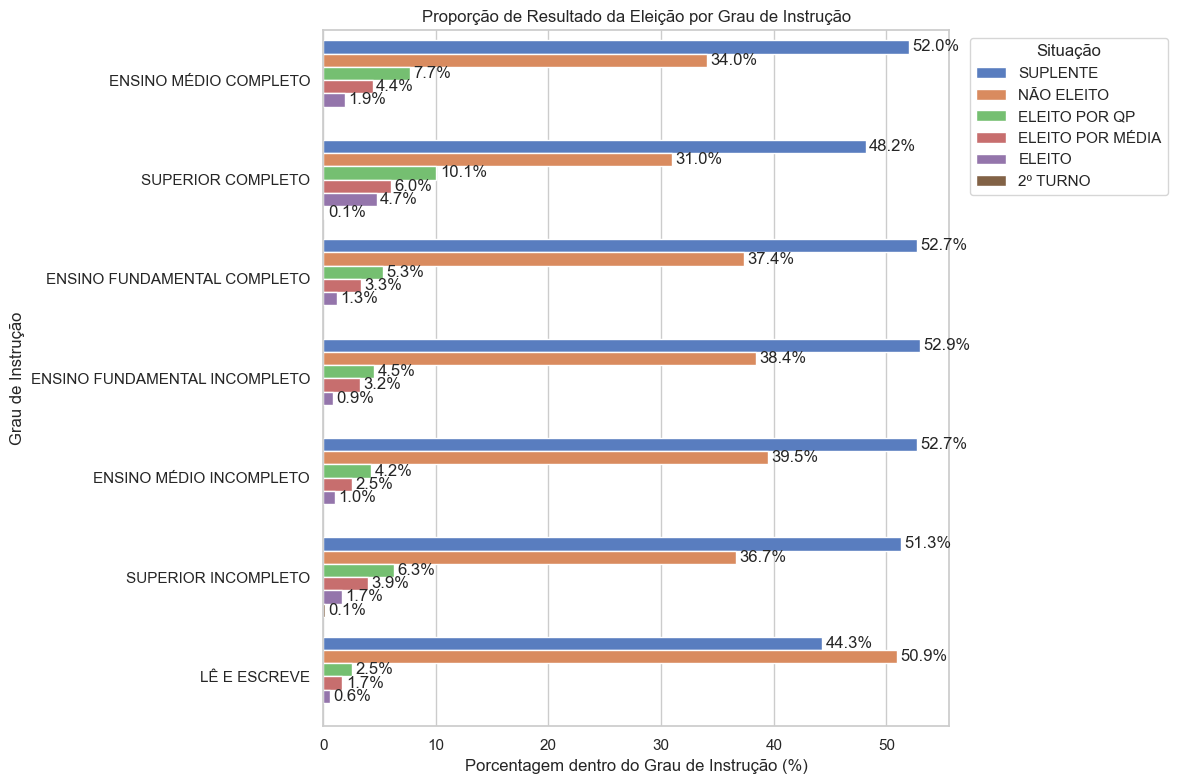

In [20]:
# 1. Calcular a proporção de cada situação (hue) DENTRO de cada grupo de grau de instrução (y).
#    O normalize=True calcula a proporção, e o mul(100) converte para porcentagem.
df_prop_instrucao = df.groupby('DS_GRAU_INSTRUCAO')['DS_SIT_TOT_TURNO'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()

# 2. Manter a mesma ordem do gráfico original (baseado na contagem total de cada grau de instrução).
ordem_instrucao = df['DS_GRAU_INSTRUCAO'].value_counts().index

# 3. Gerar o gráfico de barras horizontal com as proporções.
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_prop_instrucao, y='DS_GRAU_INSTRUCAO', x='Porcentagem', hue='DS_SIT_TOT_TURNO', 
                 order=ordem_instrucao, palette='muted')

# 4. Adicionar os valores percentuais ao lado de cada barra para clareza.
for p in ax.patches:
    width = p.get_width()
    # Apenas adiciona a anotação se a largura da barra for maior que um pequeno limiar.
    if width > 0.1:
        ax.text(width + 0.3, # Posição x (um pouco à direita da barra)
                p.get_y() + p.get_height() / 2., # Posição y (no meio da barra)
                f'{width:.1f}%', # O texto da porcentagem, com uma casa decimal
                va='center')

# 5. Títulos e rótulos
plt.title("Proporção de Resultado da Eleição por Grau de Instrução")
plt.xlabel("Porcentagem dentro do Grau de Instrução (%)")
plt.ylabel("Grau de Instrução")
# Move a legenda para fora da área do gráfico para evitar sobreposição
plt.legend(title='Situação', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()








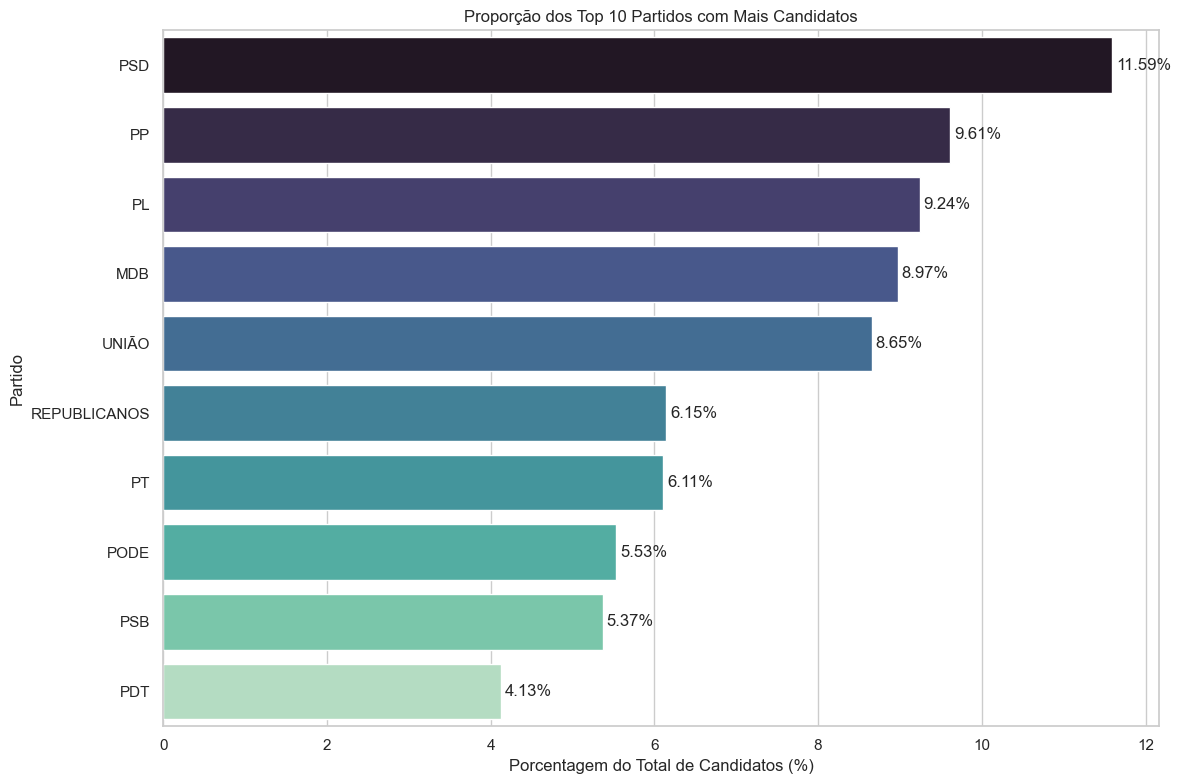

In [21]:
# 1. Contar o número de candidatos por partido e selecionar os 10 maiores.
partido_counts = df['SG_PARTIDO'].value_counts().head(10)

# 2. Calcular a proporção de cada um desses partidos em relação ao TOTAL de candidatos.
total_candidatos = len(df)
partido_proporcao = (partido_counts / total_candidatos) * 100

# 3. Converter para um DataFrame para a plotagem.
df_prop_partido = partido_proporcao.reset_index()
df_prop_partido.columns = ['Partido', 'Porcentagem']

# 4. Gerar o gráfico de barras horizontal.
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_prop_partido, y='Partido', x='Porcentagem', hue='Partido',
                 order=partido_counts.index, palette='mako', legend=False)

# 5. Adicionar as anotações percentuais ao lado das barras.
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 0.05, # Posição x
                p.get_y() + p.get_height() / 2., # Posição y
                f'{width:.2f}%', # Texto da anotação
                va='center')

# 6. Títulos e rótulos.
plt.title("Proporção dos Top 10 Partidos com Mais Candidatos")
plt.xlabel("Porcentagem do Total de Candidatos (%)")
plt.ylabel("Partido")
plt.tight_layout()
plt.show()

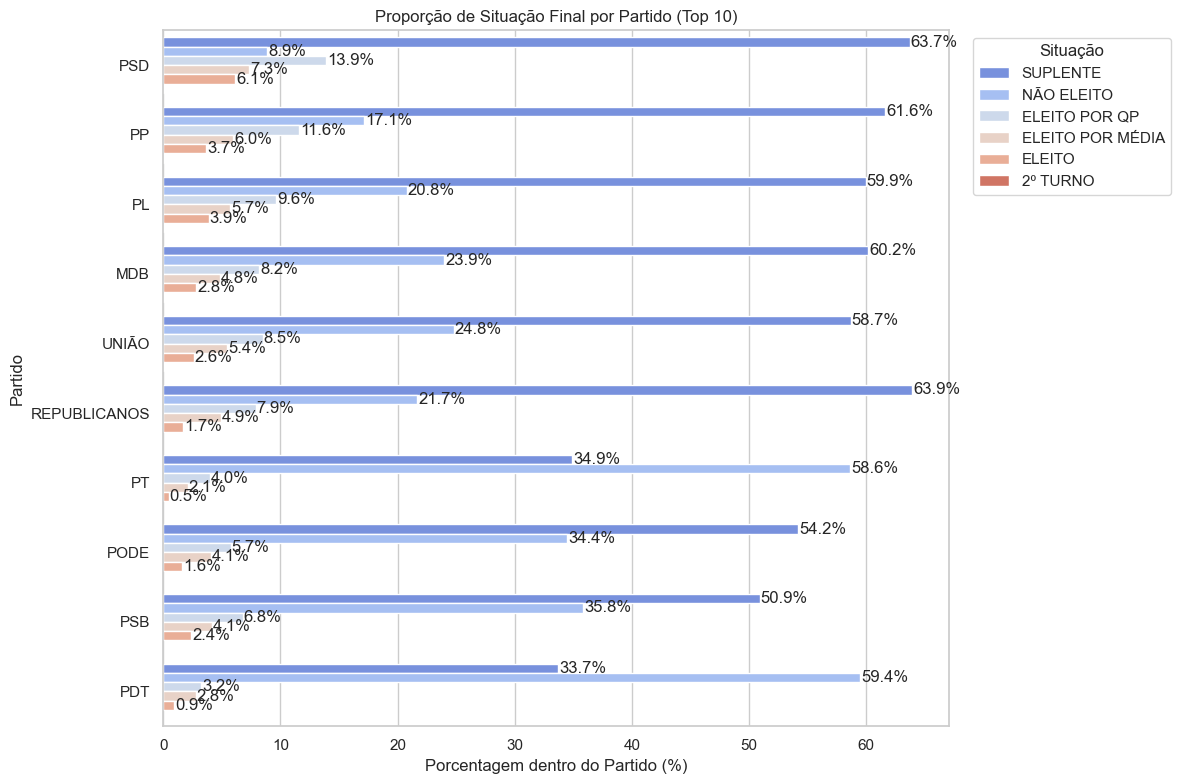

In [23]:
# 1. Identificar os 10 maiores partidos (esta etapa é necessária para a lógica a seguir).
top_partidos = df['SG_PARTIDO'].value_counts().head(10)

# 2. Filtrar o DataFrame para conter apenas os dados desses 10 partidos.
df_top_partidos = df[df['SG_PARTIDO'].isin(top_partidos.index)]

# 3. Calcular a proporção de cada situação (hue) DENTRO de cada um dos top 10 partidos (y).
df_prop_partido = df_top_partidos.groupby('SG_PARTIDO')['DS_SIT_TOT_TURNO'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()

# 4. Gerar o gráfico de barras horizontal com as proporções.
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_prop_partido, y='SG_PARTIDO', x='Porcentagem', hue='DS_SIT_TOT_TURNO', 
                 order=top_partidos.index, palette='coolwarm')

# 5. Adicionar os valores percentuais ao lado de cada barra.
for p in ax.patches:
    width = p.get_width()
    # Apenas anota se a largura da barra for maior que um pequeno limiar para evitar poluição visual.
    if width > 0.1:
        ax.text(width + 0.1, # Posição x
                p.get_y() + p.get_height() / 2., # Posição y
                f'{width:.1f}%', # Texto da anotação
                va='center')

# 6. Títulos e rótulos.
plt.title("Proporção de Situação Final por Partido (Top 10)")
plt.xlabel("Porcentagem dentro do Partido (%)")
plt.ylabel("Partido")
plt.legend(title='Situação', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

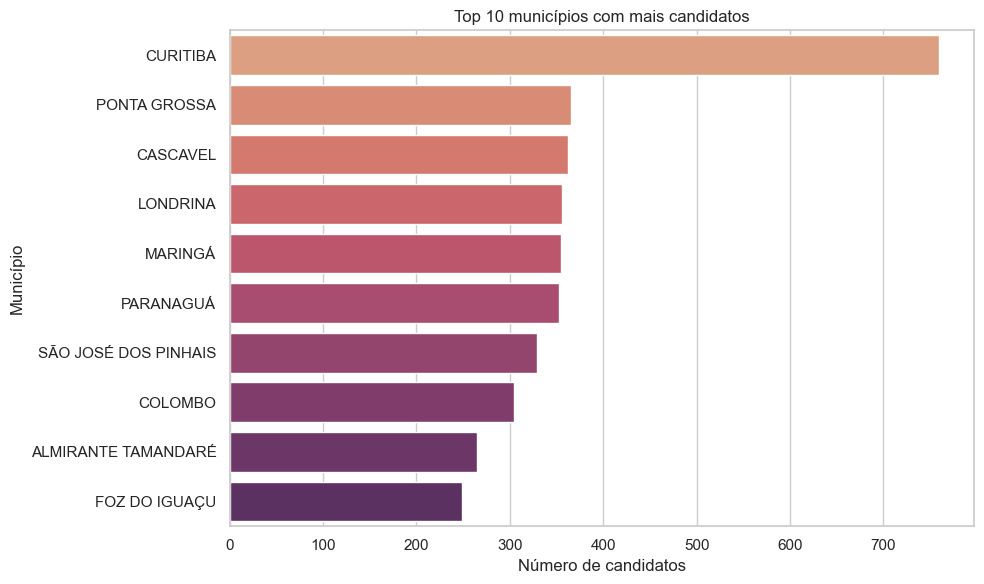

In [24]:
top_cidades = df['NM_UE'].value_counts().head(10)

# Convertendo para DataFrame para aplicar `hue=y` como sugerido
df_top_cidades = top_cidades.reset_index()
df_top_cidades.columns = ['NM_UE', 'QTD_CANDIDATOS']

sns.barplot(data=df_top_cidades, x='QTD_CANDIDATOS', y='NM_UE', hue='NM_UE', palette='flare', legend=False)
plt.title("Top 10 municípios com mais candidatos")
plt.xlabel("Número de candidatos")
plt.ylabel("Município")
plt.tight_layout()
plt.show()


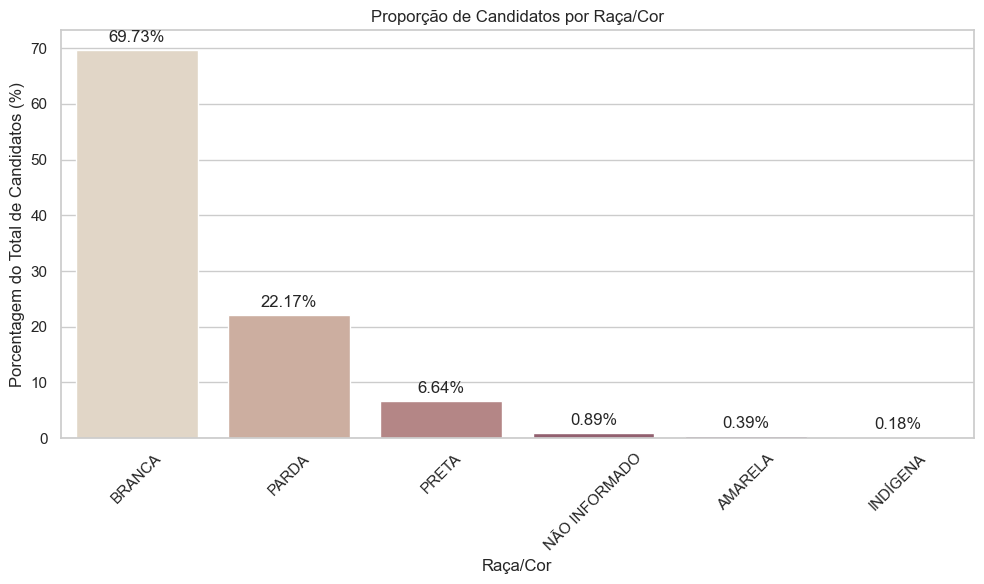

In [27]:
# 1. Contar o número de candidatos por raça/etnia.
raca_counts = df['DS_COR_RACA'].value_counts()

# 2. Calcular a proporção de cada categoria em relação ao TOTAL de candidatos.
total_candidatos = len(df)
raca_proporcao = (raca_counts / total_candidatos) * 100

# 3. Converter para um DataFrame para a plotagem.
df_prop_raca = raca_proporcao.reset_index()
df_prop_raca.columns = ['Raca_Cor', 'Porcentagem']

# 4. Gerar o gráfico de barras vertical.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_prop_raca, x='Raca_Cor', y='Porcentagem', hue='Raca_Cor',
                 order=raca_counts.index, palette='ch:s=.25', legend=False)

# 5. Adicionar as anotações percentuais no topo das barras.
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

# 6. Títulos e rótulos.
plt.title("Proporção de Candidatos por Raça/Cor")
plt.xlabel("Raça/Cor")
plt.ylabel("Porcentagem do Total de Candidatos (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

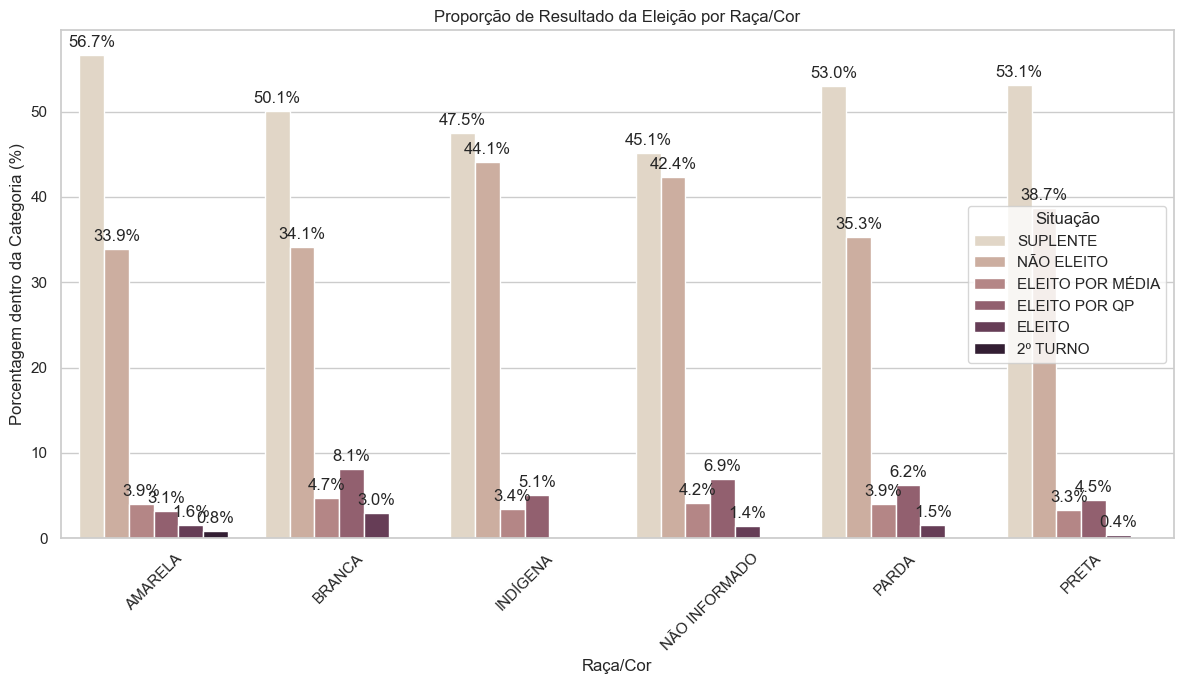

In [26]:
# 1. Calcular a proporção de cada situação (hue) DENTRO de cada grupo de raça/cor (x).
df_prop_raca = df.groupby('DS_COR_RACA')['DS_SIT_TOT_TURNO'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()

# 2. Gerar o gráfico de barras agrupado com as proporções.
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_prop_raca, x='DS_COR_RACA', y='Porcentagem', hue='DS_SIT_TOT_TURNO', 
                 palette='ch:s=.25')

# 3. Adicionar os valores percentuais no topo de cada barra.
for p in ax.patches:
    height = p.get_height()
    # Apenas anota se a altura da barra for maior que um pequeno limiar.
    if height > 0.1:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

# 4. Títulos e rótulos.
plt.title("Proporção de Resultado da Eleição por Raça/Cor")
plt.xlabel("Raça/Cor")
plt.ylabel("Porcentagem dentro da Categoria (%)")
plt.xticks(rotation=45)
plt.legend(title='Situação')
plt.tight_layout()
plt.show()

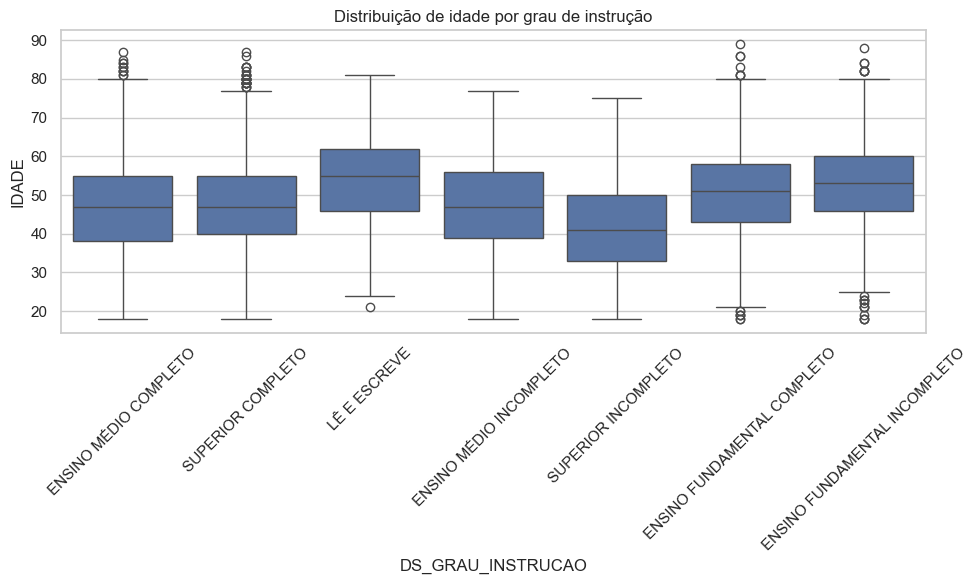

In [15]:
sns.boxplot(data=df, x='DS_GRAU_INSTRUCAO', y='IDADE')
plt.xticks(rotation=45)
plt.title("Distribuição de idade por grau de instrução")
plt.tight_layout()
plt.show()


In [29]:
import numpy as np

# 1. Definir as listas de status para cada categoria
status_eleito = ['ELEITO', 'ELEITO POR QP', 'ELEITO POR MÉDIA', '2º TURNO']
status_nao_eleito = ['NÃO ELEITO', 'SUPLENTE']

# 2. Criar um novo DataFrame focado no modelo, contendo apenas os status de interesse.
#    Isso garante que estamos trabalhando apenas com os resultados que definimos.
df_modelo = df[df['DS_SIT_TOT_TURNO'].isin(status_eleito + status_nao_eleito)].copy()

# 3. Criar a nova coluna binária 'RESULTADO' usando a função np.where do NumPy.
#    A lógica é: se a situação ESTIVER na lista status_eleito, o valor da nova coluna será 1, senão será 0.
df_modelo['RESULTADO'] = np.where(df_modelo['DS_SIT_TOT_TURNO'].isin(status_eleito), 1, 0)

# 4. Verificar o resultado da transformação para confirmar
print("Distribuição da nova variável alvo 'RESULTADO' (1 = Eleito, 0 = Não Eleito):")
print(df_modelo['RESULTADO'].value_counts())

# A partir de agora, podemos usar o 'df_modelo' para as análises que antecedem a modelagem.


Distribuição da nova variável alvo 'RESULTADO' (1 = Eleito, 0 = Não Eleito):
RESULTADO
0    27788
1     4656
Name: count, dtype: int64


In [30]:
tabela_genero = pd.crosstab(df_modelo['DS_GENERO'], df_modelo['RESULTADO'], normalize='index') * 100
print("Taxa de Sucesso por Gênero (%):")
print(tabela_genero)

Taxa de Sucesso por Gênero (%):
RESULTADO          0          1
DS_GENERO                      
FEMININO   92.801521   7.198479
MASCULINO  81.957944  18.042056


In [31]:
# Tabela de proporção para Grau de Instrução vs. Resultado
tabela_instrucao = pd.crosstab(df_modelo['DS_GRAU_INSTRUCAO'], df_modelo['RESULTADO'], normalize='index') * 100
print("\nTaxa de Sucesso por Grau de Instrução (%):")
print(tabela_instrucao.sort_values(by=1, ascending=False)) # Ordena pela taxa de sucesso (coluna 1)


Taxa de Sucesso por Grau de Instrução (%):
RESULTADO                              0          1
DS_GRAU_INSTRUCAO                                  
SUPERIOR COMPLETO              79.121115  20.878885
ENSINO MÉDIO COMPLETO          86.036221  13.963779
SUPERIOR INCOMPLETO            87.940762  12.059238
ENSINO FUNDAMENTAL COMPLETO    90.106580   9.893420
ENSINO FUNDAMENTAL INCOMPLETO  91.382979   8.617021
ENSINO MÉDIO INCOMPLETO        92.181818   7.818182
LÊ E ESCREVE                   95.190948   4.809052


In [32]:
# Tabela de proporção para Raça/Cor vs. Resultado
tabela_raca = pd.crosstab(df_modelo['DS_COR_RACA'], df_modelo['RESULTADO'], normalize='index') * 100
print("\nTaxa de Sucesso por Raça/Cor (%):")
print(tabela_raca.sort_values(by=1, ascending=False)) # Ordena pela taxa de sucesso


Taxa de Sucesso por Raça/Cor (%):
RESULTADO              0          1
DS_COR_RACA                        
BRANCA         84.152595  15.847405
NÃO INFORMADO  87.500000  12.500000
PARDA          88.321980  11.678020
AMARELA        90.551181   9.448819
INDÍGENA       91.525424   8.474576
PRETA          91.740139   8.259861


In [33]:
from sklearn.model_selection import train_test_split

# 1. Selecionar as colunas que usaremos como features (preditores)
features_categoricas = ['DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_COR_RACA', 'SG_PARTIDO']
features_numericas = ['IDADE']
features_selecionadas = features_categoricas + features_numericas

# 2. Criar a matriz de features (X) e o vetor alvo (y)
X = df_modelo[features_selecionadas]
y = df_modelo['RESULTADO']

# 3. Transformar as features categóricas em um formato numérico (One-Hot Encoding)
#    Isso cria novas colunas para cada categoria (ex: DS_GENERO_MASCULINO, DS_GENERO_FEMININO)
X_numerico = pd.get_dummies(X, columns=features_categoricas, drop_first=True)

# 4. Dividir os dados em conjuntos de treino e teste
#    O modelo aprenderá com os dados de treino e será avaliado nos dados de teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(X_numerico, y, test_size=0.3, random_state=42, stratify=y)

print("Dados prontos para a modelagem!")
print(f"Shape do X_treino: {X_treino.shape}")
print(f"Shape do X_teste: {X_teste.shape}")

Dados prontos para a modelagem!
Shape do X_treino: (22710, 39)
Shape do X_teste: (9734, 39)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Instanciar o modelo de Regressão Logística
#    Usamos class_weight='balanced' para lidar com o desbalanceamento
#    max_iter=1000 para garantir que o modelo convirja sem avisos.
modelo_lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# 2. Treinar o modelo com os dados de treino
print("Treinando o modelo de Regressão Logística...")
modelo_lr.fit(X_treino, y_treino)
print("Treinamento concluído.")

# 3. Fazer previsões nos dados de teste
y_pred_lr = modelo_lr.predict(X_teste)

# 4. Avaliar o desempenho do modelo
print("\n--- Resultados da Regressão Logística ---")
print(f"Acurácia: {accuracy_score(y_teste, y_pred_lr):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_lr))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_lr))

Treinando o modelo de Regressão Logística...
Treinamento concluído.

--- Resultados da Regressão Logística ---
Acurácia: 0.65

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      8337
           1       0.25      0.72      0.37      1397

    accuracy                           0.65      9734
   macro avg       0.59      0.68      0.56      9734
weighted avg       0.83      0.65      0.70      9734


Matriz de Confusão:
[[5327 3010]
 [ 396 1001]]


In [35]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instanciar o modelo Random Forest
#    Também usamos class_weight='balanced'
modelo_rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)

# 2. Treinar o modelo
print("\nTreinando o modelo Random Forest...")
modelo_rf.fit(X_treino, y_treino)
print("Treinamento concluído.")

# 3. Fazer previsões
y_pred_rf = modelo_rf.predict(X_teste)

# 4. Avaliar o desempenho
print("\n--- Resultados do Random Forest ---")
print(f"Acurácia: {accuracy_score(y_teste, y_pred_rf):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_rf))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_rf))


Treinando o modelo Random Forest...
Treinamento concluído.

--- Resultados do Random Forest ---
Acurácia: 0.73

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      8337
           1       0.24      0.43      0.31      1397

    accuracy                           0.73      9734
   macro avg       0.57      0.60      0.57      9734
weighted avg       0.80      0.73      0.76      9734


Matriz de Confusão:
[[6493 1844]
 [ 803  594]]


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_15572\2903152931.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


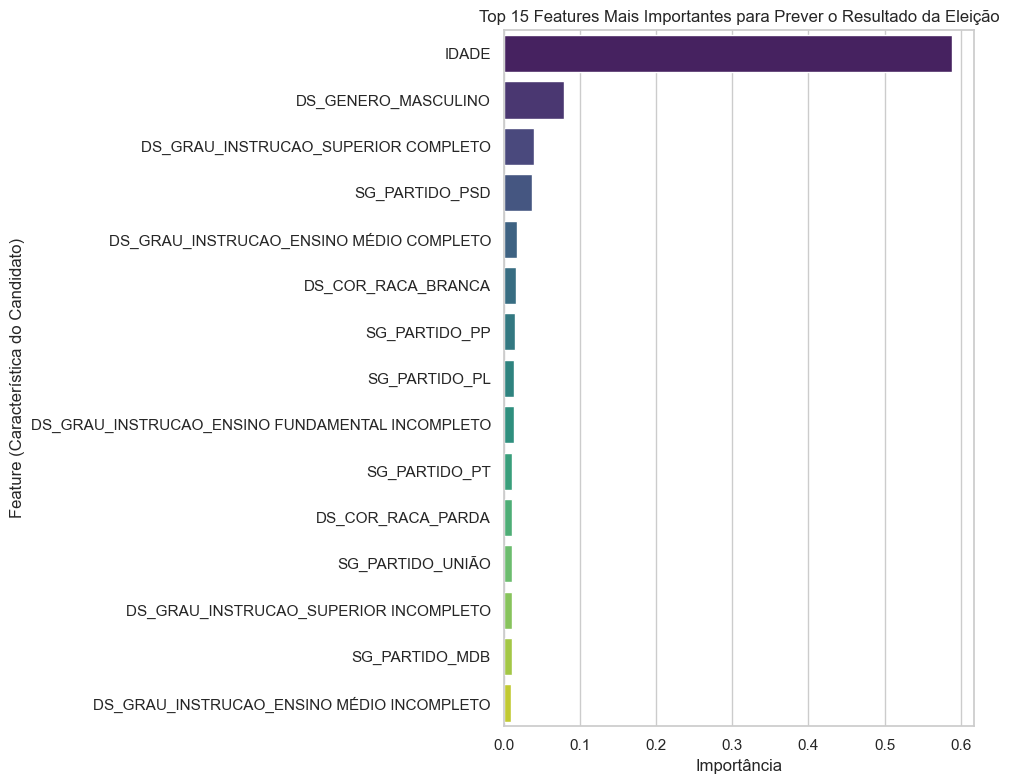

In [38]:
# 1. Obter a importância de cada feature do modelo Random Forest treinado
importances = modelo_rf.feature_importances_
features = X_treino.columns

# 2. Criar um DataFrame para facilitar a visualização
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# 3. Ordenar as features pela importância e pegar as 15 mais importantes
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

# 4. Gerar o gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 15 Features Mais Importantes para Prever o Resultado da Eleição')
plt.xlabel('Importância')
plt.ylabel('Feature (Característica do Candidato)')
plt.tight_layout()
plt.show()

In [39]:
# Supondo que 'modelo_rf' e 'X_treino' já existem no seu notebook

# 1. Obter a importância de cada feature
importances = modelo_rf.feature_importances_
features = X_treino.columns

# 2. Criar e ordenar o DataFrame de importância
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

# --- Linha a ser adicionada ---
# 3. Imprimir o DataFrame em formato de texto
print("Top 15 Features Mais Importantes (em formato de texto):")
print(feature_importance_df.to_string()) # .to_string() garante que todas as linhas sejam exibidas

Top 15 Features Mais Importantes (em formato de texto):
                                            Feature  Importance
0                                             IDADE    0.588188
1                               DS_GENERO_MASCULINO    0.078103
6               DS_GRAU_INSTRUCAO_SUPERIOR COMPLETO    0.039229
29                                   SG_PARTIDO_PSD    0.036446
3           DS_GRAU_INSTRUCAO_ENSINO MÉDIO COMPLETO    0.017240
8                                DS_COR_RACA_BRANCA    0.015599
25                                    SG_PARTIDO_PP    0.013874
22                                    SG_PARTIDO_PL    0.013151
2   DS_GRAU_INSTRUCAO_ENSINO FUNDAMENTAL INCOMPLETO    0.012634
33                                    SG_PARTIDO_PT    0.011056
11                                DS_COR_RACA_PARDA    0.010529
38                                 SG_PARTIDO_UNIÃO    0.010406
7             DS_GRAU_INSTRUCAO_SUPERIOR INCOMPLETO    0.010097
16                                   SG_PARTIDO_

In [40]:

# 1. Carregar o arquivo de redes sociais com a codificação e separador corretos.
caminho_arquivo_redes = './candidatos_2024/rede_social_candidato_2024_PR.csv'
df_redes = pd.read_csv(caminho_arquivo_redes, sep=';', encoding='latin1')

# 2. Agrupar por candidato (usando a coluna 'SQ_CANDIDATO' como identificador único)
#    e contar o número de redes sociais que cada um possui.
df_contagem_redes = df_redes.groupby('SQ_CANDIDATO').size().reset_index(name='NUM_REDES_SOCIAIS')

# 3. Exibir uma amostra do resultado para verificação.
print("Amostra do novo DataFrame com a contagem de redes sociais por candidato:")
print(df_contagem_redes.head())


Amostra do novo DataFrame com a contagem de redes sociais por candidato:
   SQ_CANDIDATO  NUM_REDES_SOCIAIS
0  160001882038                  5
1  160001882039                  2
2  160001882040                  3
3  160001882041                  3
4  160001882042                  3


In [42]:
# Lembre-se que 'df_modelo' é o DataFrame com os dados limpos e a coluna 'RESULTADO'.
# 'df_contagem_redes' é o DataFrame que você acabou de criar.

# 1. Fazer o merge (a união) dos dois DataFrames.
#    A união será feita usando a coluna em comum 'SQ_CANDIDATO'.
#    Usamos um 'left' merge para garantir que todos os candidatos do df_modelo sejam mantidos.
df_modelo_final = pd.merge(df_modelo, df_contagem_redes, on='SQ_CANDIDATO', how='left')

# 2. Tratar valores nulos (NaN) que possam ter surgido.
#    Candidatos que não estavam na lista de redes sociais ficarão com o valor NaN.
#    Vamos assumir que isso significa que eles não têm redes sociais declaradas e preencher com 0.
df_modelo_final['NUM_REDES_SOCIAIS'] = df_modelo_final['NUM_REDES_SOCIAIS'].fillna(0)
df_modelo_final['NUM_REDES_SOCIAIS'] = df_modelo_final['NUM_REDES_SOCIAIS'].astype(int)

# 3. Exibir uma amostra do resultado para verificar se o merge funcionou.
print("Merge concluído! Amostra do DataFrame final com a nova coluna:")
print(df_modelo_final[['NM_URNA_CANDIDATO', 'RESULTADO', 'NUM_REDES_SOCIAIS']].head())

# 4. Verificar a distribuição da nova variável para os eleitos vs. não eleitos
print("\nMédia de redes sociais por resultado:")
print(df_modelo_final.groupby('RESULTADO')['NUM_REDES_SOCIAIS'].mean())

Merge concluído! Amostra do DataFrame final com a nova coluna:
  NM_URNA_CANDIDATO  RESULTADO  NUM_REDES_SOCIAIS
0       JAIR MILANI          0                  7
1     RAFAEL DANTAS          0                 16
2     JAELSON MATTA          1                  3
3          SERGINHO          0                 12
4     LUIZ ASSUNÇÃO          1                  4

Média de redes sociais por resultado:
RESULTADO
0    1.688930
1    2.029854
Name: NUM_REDES_SOCIAIS, dtype: float64


In [64]:
## 1. Selecionar as features (conforme sua última modificação, sem Idade e Partido)
features_categoricas = ['DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_COR_RACA']
features_numericas = ['NUM_REDES_SOCIAIS'] 
features_selecionadas = features_categoricas + features_numericas

# Usando o DataFrame final que inclui a contagem de redes
X = df_modelo_final[features_selecionadas]
y = df_modelo_final['RESULTADO']

# 2. One-Hot Encoding e Divisão Treino/Teste
X_numerico = pd.get_dummies(X, columns=features_categoricas, drop_first=True)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_numerico, y, test_size=0.3, random_state=42, stratify=y)

# 3. Treinar e avaliar a Regressão Logística
print("Treinando a Regressão Logística...")
modelo_lr_novo = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
modelo_lr_novo.fit(X_treino, y_treino)
y_pred_lr_novo = modelo_lr_novo.predict(X_teste)

print("\n--- Resultados da Regressão Logística ---")
# LINHA ADICIONADA AQUI:
print(f"Acurácia: {accuracy_score(y_teste, y_pred_lr_novo):.2%}") 
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_lr_novo))

# 4. Treinar e avaliar o Random Forest
print("\nTreinando o Random Forest...")
modelo_rf_novo = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
modelo_rf_novo.fit(X_treino, y_treino)
y_pred_rf_novo = modelo_rf_novo.predict(X_teste)

print("\n--- Resultados do Random Forest ---")
# LINHA ADICIONADA AQUI:
print(f"Acurácia: {accuracy_score(y_teste, y_pred_rf_novo):.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_rf_novo))


Treinando a Regressão Logística...

--- Resultados da Regressão Logística ---
Acurácia: 62.53%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.63      0.74      8337
           1       0.22      0.62      0.32      1397

    accuracy                           0.63      9734
   macro avg       0.56      0.62      0.53      9734
weighted avg       0.81      0.63      0.68      9734


Treinando o Random Forest...

--- Resultados do Random Forest ---
Acurácia: 58.50%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.57      0.70      8337
           1       0.21      0.69      0.32      1397

    accuracy                           0.58      9734
   macro avg       0.56      0.63      0.51      9734
weighted avg       0.81      0.58      0.65      9734



In [65]:
## 1. Selecionar as features (conforme sua última modificação, sem Idade e Partido)
features_categoricas = ['DS_GENERO', 'DS_GRAU_INSTRUCAO']
features_numericas = ['NUM_REDES_SOCIAIS'] 
features_selecionadas = features_categoricas + features_numericas

# Usando o DataFrame final que inclui a contagem de redes
X = df_modelo_final[features_selecionadas]
y = df_modelo_final['RESULTADO']

# 2. One-Hot Encoding e Divisão Treino/Teste
X_numerico = pd.get_dummies(X, columns=features_categoricas, drop_first=True)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_numerico, y, test_size=0.3, random_state=42, stratify=y)

# 3. Treinar e avaliar a Regressão Logística
print("Treinando a Regressão Logística...")
modelo_lr_novo = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
modelo_lr_novo.fit(X_treino, y_treino)
y_pred_lr_novo = modelo_lr_novo.predict(X_teste)

print("\n--- Resultados da Regressão Logística ---")
# LINHA ADICIONADA AQUI:
print(f"Acurácia: {accuracy_score(y_teste, y_pred_lr_novo):.2%}") 
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_lr_novo))

# 4. Treinar e avaliar o Random Forest
print("\nTreinando o Random Forest...")
modelo_rf_novo = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
modelo_rf_novo.fit(X_treino, y_treino)
y_pred_rf_novo = modelo_rf_novo.predict(X_teste)

print("\n--- Resultados do Random Forest ---")
# LINHA ADICIONADA AQUI:
print(f"Acurácia: {accuracy_score(y_teste, y_pred_rf_novo):.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_rf_novo))


Treinando a Regressão Logística...

--- Resultados da Regressão Logística ---
Acurácia: 59.62%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.59      0.71      8337
           1       0.21      0.66      0.32      1397

    accuracy                           0.60      9734
   macro avg       0.56      0.62      0.52      9734
weighted avg       0.81      0.60      0.66      9734


Treinando o Random Forest...

--- Resultados do Random Forest ---
Acurácia: 52.52%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.49      0.64      8337
           1       0.20      0.76      0.32      1397

    accuracy                           0.53      9734
   macro avg       0.56      0.62      0.48      9734
weighted avg       0.82      0.53      0.59      9734



In [72]:
## 1. Selecionar as features (conforme sua última modificação, sem Idade e Partido)
features_categoricas = ['DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_COR_RACA', 'SG_PARTIDO']
features_numericas = ['IDADE', 'NUM_REDES_SOCIAIS'] 
features_selecionadas = features_categoricas + features_numericas

# Usando o DataFrame final que inclui a contagem de redes
X = df_modelo_final[features_selecionadas]
y = df_modelo_final['RESULTADO']

# 2. One-Hot Encoding e Divisão Treino/Teste
X_numerico = pd.get_dummies(X, columns=features_categoricas, drop_first=True)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_numerico, y, test_size=0.3, random_state=42, stratify=y)

# 3. Treinar e avaliar a Regressão Logística
print("Treinando a Regressão Logística...")
modelo_lr_novo = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
modelo_lr_novo.fit(X_treino, y_treino)
y_pred_lr_novo = modelo_lr_novo.predict(X_teste)

print("\n--- Resultados da Regressão Logística ---")
# LINHA ADICIONADA AQUI:
print(f"Acurácia: {accuracy_score(y_teste, y_pred_lr_novo):.2%}") 
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_lr_novo))

# 4. Treinar e avaliar o Random Forest
print("\nTreinando o Random Forest...")
modelo_rf_novo = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
modelo_rf_novo.fit(X_treino, y_treino)
y_pred_rf_novo = modelo_rf_novo.predict(X_teste)

print("\n--- Resultados do Random Forest ---")
# LINHA ADICIONADA AQUI:
print(f"Acurácia: {accuracy_score(y_teste, y_pred_rf_novo):.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_rf_novo))


Treinando a Regressão Logística...

--- Resultados da Regressão Logística ---
Acurácia: 65.70%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.65      0.76      8337
           1       0.25      0.70      0.37      1397

    accuracy                           0.66      9734
   macro avg       0.59      0.68      0.57      9734
weighted avg       0.83      0.66      0.71      9734


Treinando o Random Forest...

--- Resultados do Random Forest ---
Acurácia: 78.30%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8337
           1       0.27      0.30      0.28      1397

    accuracy                           0.78      9734
   macro avg       0.57      0.58      0.58      9734
weighted avg       0.79      0.78      0.79      9734



--- Top 15 Features Mais Importantes (Modelo com Redes Sociais) ---
                                           Feature  Importance
1                              DS_GENERO_MASCULINO    0.423481
0                                NUM_REDES_SOCIAIS    0.213175
6              DS_GRAU_INSTRUCAO_SUPERIOR COMPLETO    0.197164
3          DS_GRAU_INSTRUCAO_ENSINO MÉDIO COMPLETO    0.049240
2  DS_GRAU_INSTRUCAO_ENSINO FUNDAMENTAL INCOMPLETO    0.043167
4        DS_GRAU_INSTRUCAO_ENSINO MÉDIO INCOMPLETO    0.029563
5                   DS_GRAU_INSTRUCAO_LÊ E ESCREVE    0.028335
7            DS_GRAU_INSTRUCAO_SUPERIOR INCOMPLETO    0.015877


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_15572\2492816180.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_novo.head(15), palette='viridis')


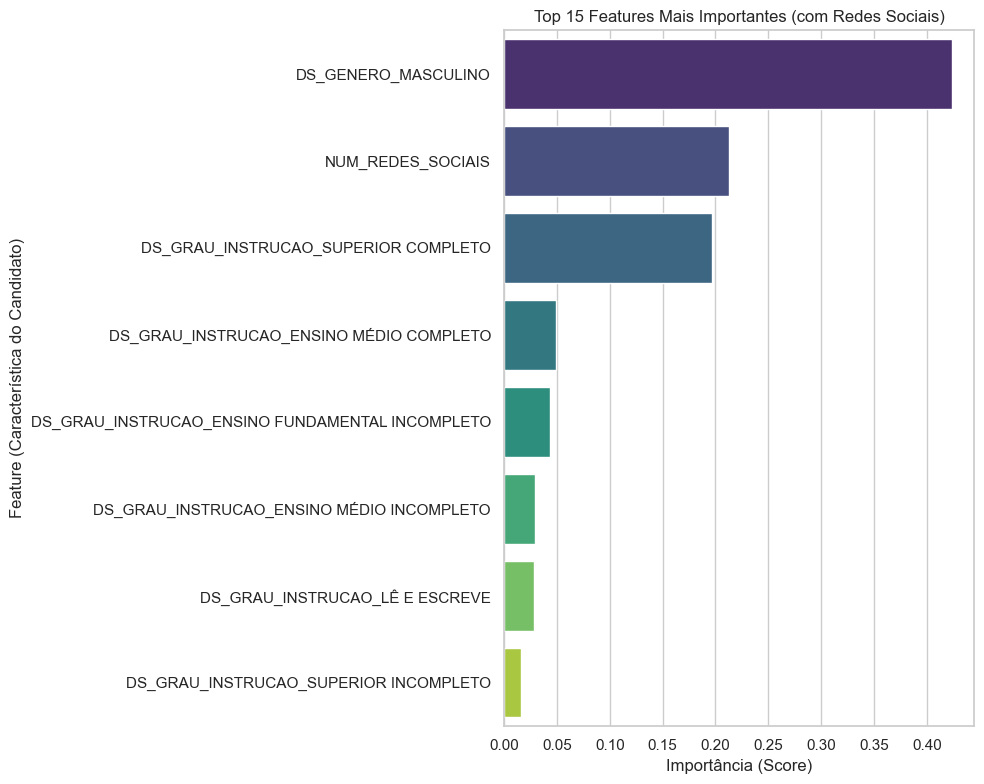

In [59]:
# Supondo que 'modelo_rf_novo' e 'X_treino' já existem e foram definidos na célula anterior.

# 1. Obter a importância de cada feature do NOVO modelo Random Forest.
#    O atributo .feature_importances_ contém os scores de cada variável.
importances_novo = modelo_rf_novo.feature_importances_
features_novo = X_treino.columns

# 2. Criar um DataFrame para facilitar a análise e a ordenação.
feature_importance_df_novo = pd.DataFrame({'Feature': features_novo, 'Importance': importances_novo})

# 3. Ordenar as features da mais importante para a menos importante.
feature_importance_df_novo = feature_importance_df_novo.sort_values(by='Importance', ascending=False)

# --- Saída em Texto ---
# 4. Imprimir a tabela com as 15 features mais importantes para sua análise.
print("--- Top 15 Features Mais Importantes (Modelo com Redes Sociais) ---")
print(feature_importance_df_novo.head(15).to_string())

# --- Saída Gráfica ---
# 5. Gerar o gráfico de barras para uma visualização clara no seu relatório.
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_novo.head(15), palette='viridis')
plt.title('Top 15 Features Mais Importantes (com Redes Sociais)')
plt.xlabel('Importância (Score)')
plt.ylabel('Feature (Característica do Candidato)')
plt.tight_layout()
plt.show()

In [60]:
# Supondo que 'modelo_rf_novo' (o modelo Random Forest treinado com redes sociais)
# e 'X_treino' (os dados de treino) já existem no seu notebook.

# 1. Obter a importância de cada feature do modelo
importances_novo = modelo_rf_novo.feature_importances_
features_novo = X_treino.columns

# 2. Criar um DataFrame para facilitar a análise e a ordenação
feature_importance_df_novo = pd.DataFrame({'Feature': features_novo, 'Importance': importances_novo})

# 3. Ordenar as features da mais importante para a menos importante
feature_importance_df_novo = feature_importance_df_novo.sort_values(by='Importance', ascending=False)

# 4. Imprimir a tabela com as 15 features mais importantes
#    O .to_string() garante que todas as colunas e linhas sejam exibidas corretamente.
print("--- Top 15 Features Mais Importantes (Modelo com Redes Sociais) ---")
print(feature_importance_df_novo.head(15).to_string())

--- Top 15 Features Mais Importantes (Modelo com Redes Sociais) ---
                                           Feature  Importance
1                              DS_GENERO_MASCULINO    0.423481
0                                NUM_REDES_SOCIAIS    0.213175
6              DS_GRAU_INSTRUCAO_SUPERIOR COMPLETO    0.197164
3          DS_GRAU_INSTRUCAO_ENSINO MÉDIO COMPLETO    0.049240
2  DS_GRAU_INSTRUCAO_ENSINO FUNDAMENTAL INCOMPLETO    0.043167
4        DS_GRAU_INSTRUCAO_ENSINO MÉDIO INCOMPLETO    0.029563
5                   DS_GRAU_INSTRUCAO_LÊ E ESCREVE    0.028335
7            DS_GRAU_INSTRUCAO_SUPERIOR INCOMPLETO    0.015877


In [68]:
df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'DS_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO',
       'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'SG_UF_NASCIMENTO', 'DT_NASCIMENTO', 'NR_TITULO_ELEITORAL_CANDIDATO',
       'CD_GENERO', 'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA',
       'CD_OCUPACAO', 'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO',
       'IDADE'],
      dtype='object')

In [69]:
# 1. Configurar o pandas para não truncar a saída e mostrar todas as linhas
pd.set_option('display.max_rows', None)

# 2. Contar todas as ocupações únicas e ordená-las pela frequência
contagem_ocupacoes = df_modelo['DS_OCUPACAO'].value_counts()

# 3. Imprimir a lista completa
print("--- Contagem de Todas as Ocupações Registradas ---")
print(contagem_ocupacoes)

# 4. (Opcional, mas recomendado) Resetar a opção de display para o padrão
pd.reset_option('display.max_rows')


--- Contagem de Todas as Ocupações Registradas ---
DS_OCUPACAO
OUTROS                                                                    6476
EMPRESÁRIO                                                                3233
AGRICULTOR                                                                2551
SERVIDOR PÚBLICO MUNICIPAL                                                2516
APOSENTADO (EXCETO SERVIDOR PÚBLICO)                                      1448
VEREADOR                                                                  1264
COMERCIANTE                                                               1230
DONA DE CASA                                                               906
ADVOGADO                                                                   637
PROFESSOR DE ENSINO FUNDAMENTAL                                            622
ADMINISTRADOR                                                              601
MOTORISTA DE VEÍCULOS DE TRANSPORTE DE CARGA                        

In [70]:
# --- Bloco de Engenharia de Feature: Agrupamento de Ocupações ---

# 1. Definir a função que irá agrupar as ocupações
def agrupar_ocupacao(ocupacao):
    # Usamos 'in' para checar se o termo existe na string da ocupação
    if any(term in ocupacao for term in ['EMPRESÁRIO', 'COMERCIANTE', 'INDUSTRIAL']):
        return 'Empresário/Comerciante'
    if any(term in ocupacao for term in ['SERVIDOR PÚBLICO']):
        return 'Servidor Público'
    if any(term in ocupacao for term in ['AGRICULTOR', 'RURAL', 'AGROPECUÁRIO', 'PECUARISTA', 'AGRÔNOMO']):
        return 'Agronegócio'
    if any(term in ocupacao for term in ['PROFESSOR', 'PEDAGOGO']):
        return 'Profissional da Educação'
    if any(term in ocupacao for term in ['MÉDICO', 'ENFERMEIRO', 'ODONTÓLOGO', 'FISIOTERAPEUTA', 'PSICÓLOGO', 'FARMACÊUTICO', 'VETERINÁRIO', 'AGENTE DE SAÚDE']):
        return 'Profissional da Saúde'
    if 'ADVOGADO' in ocupacao:
        return 'Advogado'
    if 'APOSENTADO' in ocupacao:
        return 'Aposentado/Pensionista'
    if any(term in ocupacao for term in ['VEREADOR', 'PREFEITO', 'DEPUTADO']):
        return 'Político com Mandato'
    if 'DONA DE CASA' in ocupacao:
        return 'Dona de Casa'
    if 'ESTUDANTE' in ocupacao:
        return 'Estudante'
    # Se não se encaixar em nenhuma das anteriores, será 'Outros'
    return 'Outros'

# 2. Aplicar a função para criar a nova coluna 'OCUPACAO_AGRUPADA'
df_modelo['OCUPACAO_AGRUPADA'] = df_modelo['DS_OCUPACAO'].apply(agrupar_ocupacao)

# 3. Exibir a contagem das novas categorias para verificar o resultado
print("--- Contagem de Candidatos por Categoria de Ocupação Agrupada ---")
print(df_modelo['OCUPACAO_AGRUPADA'].value_counts())

--- Contagem de Candidatos por Categoria de Ocupação Agrupada ---
OCUPACAO_AGRUPADA
Outros                      14673
Empresário/Comerciante       4584
Servidor Público             4427
Agronegócio                  3010
Profissional da Educação     1487
Político com Mandato         1420
Profissional da Saúde        1079
Dona de Casa                  906
Advogado                      637
Estudante                     221
Name: count, dtype: int64


In [76]:
df_modelo_final['OCUPACAO_AGRUPADA'] = df_modelo_final['DS_OCUPACAO'].apply(agrupar_ocupacao)

print("--- Contagem de Candidatos por Categoria de Ocupação Agrupada ---")
print(df_modelo['OCUPACAO_AGRUPADA'].value_counts())

--- Contagem de Candidatos por Categoria de Ocupação Agrupada ---
OCUPACAO_AGRUPADA
Outros                      14673
Empresário/Comerciante       4584
Servidor Público             4427
Agronegócio                  3010
Profissional da Educação     1487
Político com Mandato         1420
Profissional da Saúde        1079
Dona de Casa                  906
Advogado                      637
Estudante                     221
Name: count, dtype: int64


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- Bloco de Treinamento com a Feature de Ocupação Agrupada ---

# 1. Selecionar as features, adicionando a nova variável categórica.
#    Mantemos todas as features do nosso melhor modelo e adicionamos a nova.
features_categoricas = ['DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_COR_RACA', 'SG_PARTIDO', 'OCUPACAO_AGRUPADA']
features_numericas = ['IDADE', 'NUM_REDES_SOCIAIS']
features_selecionadas = features_categoricas + features_numericas

# Usando o df_modelo que agora contém a coluna 'OCUPACAO_AGRUPADA'
X = df_modelo_final[features_selecionadas]
y = df_modelo_final['RESULTADO']

# 2. One-Hot Encoding e Divisão Treino/Teste
X_numerico = pd.get_dummies(X, columns=features_categoricas, drop_first=True)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_numerico, y, test_size=0.3, random_state=42, stratify=y)

# 3. Treinar e avaliar a Regressão Logística (versão final)
print("--- Treinando a Regressão Logística (com Ocupação) ---")
modelo_lr_final = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
modelo_lr_final.fit(X_treino, y_treino)
y_pred_lr_final = modelo_lr_final.predict(X_teste)

print(f"\nAcurácia: {accuracy_score(y_teste, y_pred_lr_final):.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_lr_final))

# 4. Treinar e avaliar o Random Forest (versão final)
print("\n--- Treinando o Random Forest (com Ocupação) ---")
modelo_rf_final = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
modelo_rf_final.fit(X_treino, y_treino)
y_pred_rf_final = modelo_rf_final.predict(X_teste)

print(f"\nAcurácia: {accuracy_score(y_teste, y_pred_rf_final):.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_rf_final))

--- Treinando a Regressão Logística (com Ocupação) ---

Acurácia: 70.21%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      8337
           1       0.28      0.70      0.40      1397

    accuracy                           0.70      9734
   macro avg       0.61      0.70      0.60      9734
weighted avg       0.84      0.70      0.74      9734


--- Treinando o Random Forest (com Ocupação) ---

Acurácia: 82.61%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      8337
           1       0.36      0.26      0.30      1397

    accuracy                           0.83      9734
   macro avg       0.62      0.59      0.60      9734
weighted avg       0.81      0.83      0.81      9734



In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- Bloco de Treinamento com a Feature de Ocupação Agrupada ---

# 1. Selecionar as features, adicionando a nova variável categórica.
#    Mantemos todas as features do nosso melhor modelo e adicionamos a nova.
features_categoricas = ['DS_GENERO', 'DS_GRAU_INSTRUCAO', 'OCUPACAO_AGRUPADA']
features_numericas = ['NUM_REDES_SOCIAIS']
features_selecionadas = features_categoricas + features_numericas

# Usando o df_modelo que agora contém a coluna 'OCUPACAO_AGRUPADA'
X = df_modelo_final[features_selecionadas]
y = df_modelo_final['RESULTADO']

# 2. One-Hot Encoding e Divisão Treino/Teste
X_numerico = pd.get_dummies(X, columns=features_categoricas, drop_first=True)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_numerico, y, test_size=0.3, random_state=42, stratify=y)

# 3. Treinar e avaliar a Regressão Logística (versão final)
print("--- Treinando a Regressão Logística (com Ocupação) ---")
modelo_lr_final = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
modelo_lr_final.fit(X_treino, y_treino)
y_pred_lr_final = modelo_lr_final.predict(X_teste)

print(f"\nAcurácia: {accuracy_score(y_teste, y_pred_lr_final):.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_lr_final))

# 4. Treinar e avaliar o Random Forest (versão final)
print("\n--- Treinando o Random Forest (com Ocupação) ---")
modelo_rf_final = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
modelo_rf_final.fit(X_treino, y_treino)
y_pred_rf_final = modelo_rf_final.predict(X_teste)

print(f"\nAcurácia: {accuracy_score(y_teste, y_pred_rf_final):.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_rf_final))

--- Treinando a Regressão Logística (com Ocupação) ---

Acurácia: 68.62%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      8337
           1       0.26      0.62      0.36      1397

    accuracy                           0.69      9734
   macro avg       0.59      0.66      0.58      9734
weighted avg       0.82      0.69      0.73      9734


--- Treinando o Random Forest (com Ocupação) ---

Acurácia: 67.49%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      8337
           1       0.25      0.62      0.36      1397

    accuracy                           0.67      9734
   macro avg       0.58      0.65      0.57      9734
weighted avg       0.82      0.67      0.72      9734



In [91]:
# Supondo que você carregue seu arquivo de bens em df_bens
df_bens = pd.read_csv('./candidatos_2024/bem_candidato_2024_PR.csv', sep=';', encoding='latin1')

# 1. Limpar a coluna de valor do bem.
#    Esta função substitui a vírgula por ponto e converte para número.
df_bens['VR_BEM_CANDIDATO'] = df_bens['VR_BEM_CANDIDATO'].str.replace(',', '.').astype(float)

# 2. Agrupar por candidato e somar o valor total dos bens.
df_total_bens = df_bens.groupby('SQ_CANDIDATO')['VR_BEM_CANDIDATO'].sum().reset_index()
df_total_bens.rename(columns={'VR_BEM_CANDIDATO': 'TOTAL_BENS'}, inplace=True)

# 3. Verificar o resultado
print("Amostra do DataFrame com o valor total de bens por candidato:")
print(df_total_bens.head())

Amostra do DataFrame com o valor total de bens por candidato:
   SQ_CANDIDATO  TOTAL_BENS
0  160001882038  1608992.20
1  160001882039  1126763.00
2  160001882041   291000.00
3  160001882042  1264292.17
4  160001882043   118000.00


In [92]:
# 'df_modelo' já contém as features limpas e a ocupação agrupada.
# 'df_total_bens' contém o valor total de bens que você acabou de criar.

# 1. Fazer o merge (a união) dos dois DataFrames pela coluna em comum 'SQ_CANDIDATO'
#    Usamos 'how='left'' para garantir que todos os candidatos do df_modelo sejam mantidos.
df_finalissimo = pd.merge(df_modelo_final, df_total_bens, on='SQ_CANDIDATO', how='left')

# 2. Preencher com 0 os candidatos que não estavam no arquivo de bens (ou seja, não declararam bens).
df_finalissimo['TOTAL_BENS'].fillna(0, inplace=True)

# 3. Exibir uma amostra do resultado para verificar se o merge funcionou corretamente.
print("Merge concluído! Amostra do DataFrame final com a nova coluna de bens:")
print(df_finalissimo[['NM_URNA_CANDIDATO', 'RESULTADO', 'OCUPACAO_AGRUPADA', 'TOTAL_BENS']].head())

Merge concluído! Amostra do DataFrame final com a nova coluna de bens:
  NM_URNA_CANDIDATO  RESULTADO       OCUPACAO_AGRUPADA  TOTAL_BENS
0       JAIR MILANI          0                  Outros   995786.01
1     RAFAEL DANTAS          0                  Outros   794945.31
2     JAELSON MATTA          1    Político com Mandato   175905.10
3          SERGINHO          0  Empresário/Comerciante   605185.00
4     LUIZ ASSUNÇÃO          1        Servidor Público  3394306.89


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_15572\3095814635.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_finalissimo['TOTAL_BENS'].fillna(0, inplace=True)


In [95]:
# 1. Selecionar todas as features que queremos testar.
#    Note que adicionamos 'DS_ESTADO_CIVIL' e 'TOTAL_BENS'.
features_categoricas = ['DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_COR_RACA', 'SG_PARTIDO', 'OCUPACAO_AGRUPADA', 'DS_ESTADO_CIVIL']
features_numericas = ['IDADE', 'NUM_REDES_SOCIAIS', 'TOTAL_BENS']
features_selecionadas = features_categoricas + features_numericas

# Usando o DataFrame 'df_finalissimo' que criamos na etapa anterior
X = df_finalissimo[features_selecionadas]
y = df_finalissimo['RESULTADO']

# 2. One-Hot Encoding e Divisão Treino/Teste
X_numerico = pd.get_dummies(X, columns=features_categoricas, drop_first=True)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_numerico, y, test_size=0.3, random_state=42, stratify=y)

# 3. Treinar e avaliar a Regressão Logística (versão mais completa)
print("\n--- Treinando a Regressão Logística (Modelo Mais Completo) ---")
modelo_lr_completo = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
modelo_lr_completo.fit(X_treino, y_treino)
y_pred_lr_completo = modelo_lr_completo.predict(X_teste)

print(f"\nAcurácia: {accuracy_score(y_teste, y_pred_lr_completo):.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_lr_completo))

# 4. Treinar e avaliar o Random Forest (versão mais completa)
print("\n--- Treinando o Random Forest (Modelo Mais Completo) ---")
modelo_rf_completo = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
modelo_rf_completo.fit(X_treino, y_treino)
y_pred_rf_completo = modelo_rf_completo.predict(X_teste)

print(f"\nAcurácia: {accuracy_score(y_teste, y_pred_rf_completo):.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_rf_completo))


--- Treinando a Regressão Logística (Modelo Mais Completo) ---

Acurácia: 71.42%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      8337
           1       0.29      0.68      0.40      1397

    accuracy                           0.71      9734
   macro avg       0.61      0.70      0.61      9734
weighted avg       0.84      0.71      0.75      9734


--- Treinando o Random Forest (Modelo Mais Completo) ---

Acurácia: 85.19%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8337
           1       0.45      0.16      0.24      1397

    accuracy                           0.85      9734
   macro avg       0.66      0.56      0.58      9734
weighted avg       0.81      0.85      0.82      9734



### Modelos com Melhor Resultado por Métrica

---

**1. Maior Acurácia Geral (Melhor em acertar o resultado geral)**

* **Modelo Vencedor:** `Random Forest com Todas as Features` (incluindo ocupação, bens e estado civil).
* **Resultado:** 85.19% de acurácia.
* **Interpretação:** Este modelo é o que mais acerta o resultado geral dos candidatos. No entanto, sua alta acurácia é um pouco enganosa, pois ela é impulsionada pela sua excelente capacidade de prever a classe majoritária ("Não Eleito"), enquanto seu desempenho para encontrar os "Eleitos" foi muito baixo (recall de apenas 16%).

---

**2. Maior Recall (Melhor em "encontrar" os candidatos eleitos)**

* **Modelo Vencedor:** `Random Forest SEM Idade, Partido e Raça`.
* **Resultado:** Recall de 76% para a classe "Eleito".
* **Interpretação:** Este modelo foi o melhor "detetive" para encontrar os candidatos que realmente ganharam. De todos os eleitos no conjunto de teste, ele identificou 76%. O contraponto é que ele teve a menor precisão, o que significa que gerou muitos "alarmes falsos".

---

**3. Maior Precisão (Mais "confiável" ao prever um eleito)**

* **Modelo Vencedor:** `Random Forest com Todas as Features`.
* **Resultado:** Precisão de 45% para a classe "Eleito".
* **Interpretação:** Quando este modelo específico previu que um candidato seria eleito, ele estava correto em 45% das vezes. Apesar de ter o pior recall (só encontrou 16% dos eleitos), os poucos que ele "apontou" tinham uma chance maior de estarem corretos.

---

**4. Maior F1-Score (O Modelo Mais Equilibrado)**

* **Modelo Vencedor:** `Regressão Logística com Todas as Features`.
* **Resultado:** F1-Score de 0.40 para a classe "Eleito".
* **Interpretação:** Esta é a conclusão mais importante para o seu trabalho. O F1-Score mede o equilíbrio entre a precisão e o recall. Este modelo de Regressão Logística, ao incorporar as features que criamos (como a de Ocupação), atingiu o melhor equilíbrio entre encontrar um bom número de candidatos eleitos (recall de 68%) e ter uma razoável confiança nessas previsões (precisão de 29%).